In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [35]:
data = pd.read_csv("data_annotated.csv")
data.head()

,doc_id,url,cache,fulltext,nature,published,entity_name,entity_type,geo_path,extracted_text,embeddings,typed_embeddings,km_cluster_labels,llama3:1b_llm_is_project
0,1058/fb940_2023.020.pdf,https://www.ermont.fr/fileadmin/www.ermont.fr/...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,acte.arrete,2023-02-17 00:00:00,Ermont,Commune,Ermont/CA Val Parisis/Val-d'Oise/Île-de-France,* REPUBLIQUE FRANÇAISE DEPARTEMENT du VAL D'OI...,[-5.00864536e-02 1.34651005e-01 -7.00120330e-...,"[-0.0500864536, 0.134651005, -0.070012033, 0.1...",1.0,1. Is the building concerned by regulations in...
1,6763/bb9f0990f8ed563f586d881c42df16d7df699606_...,https://www.correze.gouv.fr/contenu/telecharge...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,acte.arrete,2023-01-13 00:00:00,Préfecture - Corrèze,Préfecture,Corrèze/Nouvelle-Aquitaine,PRÉFET DE LA CORRÈZE RECUEIL DES ACTES ADMINIS...,[-4.19478863e-02 1.81751396e-03 -1.92429498e-...,"[-0.0419478863, 0.00181751396, -0.0192429498, ...",0.0,1
2,6767/0ae0df0f3596ad4687621b7753a150fe55e75883_...,https://www.creuse.gouv.fr/contenu/telechargem...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,acte.arrete,2023-01-16 00:00:00,Préfecture - Creuse,Préfecture,Creuse/Nouvelle-Aquitaine,PRÉFÈTE DE LA CREUSE RECUEIL DES ACTES ADMINIS...,[-3.28501053e-02 1.09066427e-01 -1.61550164e-...,"[-0.0328501053, 0.109066427, -0.161550164, 0.1...",0.0,1
3,2212/df590_CCPF_RSanc_approuve.pdf,https://www.cc-paysdefayence.fr/wp-content/upl...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,acte.arrete,2023-03-01 00:00:00,CC du Pays de Fayence,Intercommunalité,CC du Pays de Fayence/Var/Provence-Alpes-Côte ...,Eau et Assainissement REGIE DES EAUX DU PAYS D...,[ 3.24184373e-02 -1.52655896e-02 -3.54909562e-...,"[0.0324184373, -0.0152655896, -0.0354909562, 0...",0.0,1
4,3395/bfdd09c728391ba9f29bf516a68553dedcd243cd_...,https://www.soisy-sous-montmorency.fr/wp-conte...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,acte.arrete,2023-03-09 00:00:00,Soisy-sous-Montmorency,Commune,Soisy-sous-Montmorency/CA Plaine Vallée/Val-d'...,REPUBLIQUE FRANCAISE DECISION DU MAIRE PRISE L...,[-8.80177468e-02 -6.38791397e-02 1.20596491e-...,"[-0.0880177468, -0.0638791397, 0.120596491, 0....",1.0,1


In [36]:
def check_len(text):
    
    text = str(text)
    splits = text.split(" ")
    length = len(splits)
    
    return length

In [37]:
data["naive_length"] = data["extracted_text"].apply(check_len)

In [38]:
cols = ["extracted_text", "entity_type", "nature", "naive_length"]
data_filter = data[cols]
data_filter.head()

,extracted_text,entity_type,nature,naive_length
0,* REPUBLIQUE FRANÇAISE DEPARTEMENT du VAL D'OI...,Commune,acte.arrete,17016
1,PRÉFET DE LA CORRÈZE RECUEIL DES ACTES ADMINIS...,Préfecture,acte.arrete,6383
2,PRÉFÈTE DE LA CREUSE RECUEIL DES ACTES ADMINIS...,Préfecture,acte.arrete,8125
3,Eau et Assainissement REGIE DES EAUX DU PAYS D...,Intercommunalité,acte.arrete,8814
4,REPUBLIQUE FRANCAISE DECISION DU MAIRE PRISE L...,Commune,acte.arrete,382


In [39]:
data_filter.dtypes

extracted_text    object
entity_type       object
nature            object
naive_length       int64
dtype: object

In [40]:
data_filter["nature"].value_counts()

nature
comm           5688
pv.cr          2755
dlao.plu       2573
acte.delib     1168
other           694
acte.arrete     518
pv.full         434
bdj             269
dlao.autres     174
acte.raa         35
Name: count, dtype: int64

In [41]:
data_filter["entity_type"].value_counts()

entity_type
Commune                              8141
Intercommunalité                     3382
Préfecture                           1118
Autre groupement                      854
Conseil régional                      438
Conseil départemental                 230
Collectivité à statut particulier      50
Autre partie prenante                  46
Etablissement public                   38
Préfecture de police                   11
Name: count, dtype: int64

## Analyzing Document Length

In [42]:
data_filter["naive_page_num"] = data_filter["naive_length"] / 500

C:\Users\alber\AppData\Local\Temp\ipykernel_17720\1644821041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter["naive_page_num"] = data_filter["naive_length"] / 500


In [43]:
data_filter["naive_length"]

0        17016
1         6383
2         8125
3         8814
4          382
         ...  
14303    23603
14304     5034
14305    19941
14306    10021
14307     6955
Name: naive_length, Length: 14308, dtype: int64

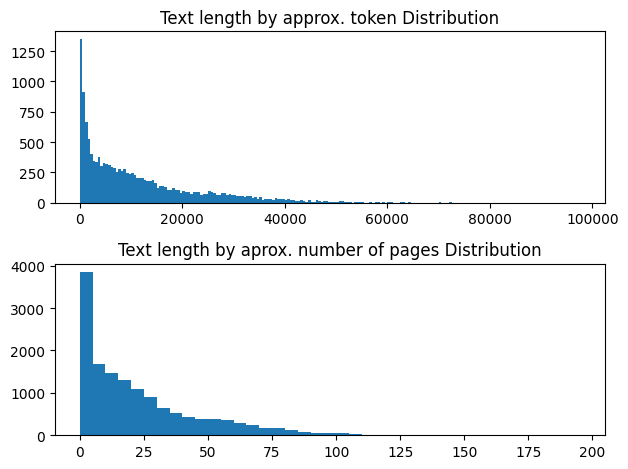

In [44]:
fig, ax = plt.subplots(2, 1)

ax[0].hist(data_filter["naive_length"], 
        bins=np.arange(0, 
                        data_filter["naive_length"].max(), 
                        500)
        )
ax[0].set_title("Text length by approx. token Distribution")

######################

ax[1].hist(data_filter["naive_page_num"], 
        bins=np.arange(0, 
                        data_filter["naive_page_num"].max(), 
                        5)
        )
ax[1].set_title("Text length by aprox. number of pages Distribution")

fig.tight_layout()
plt.show()

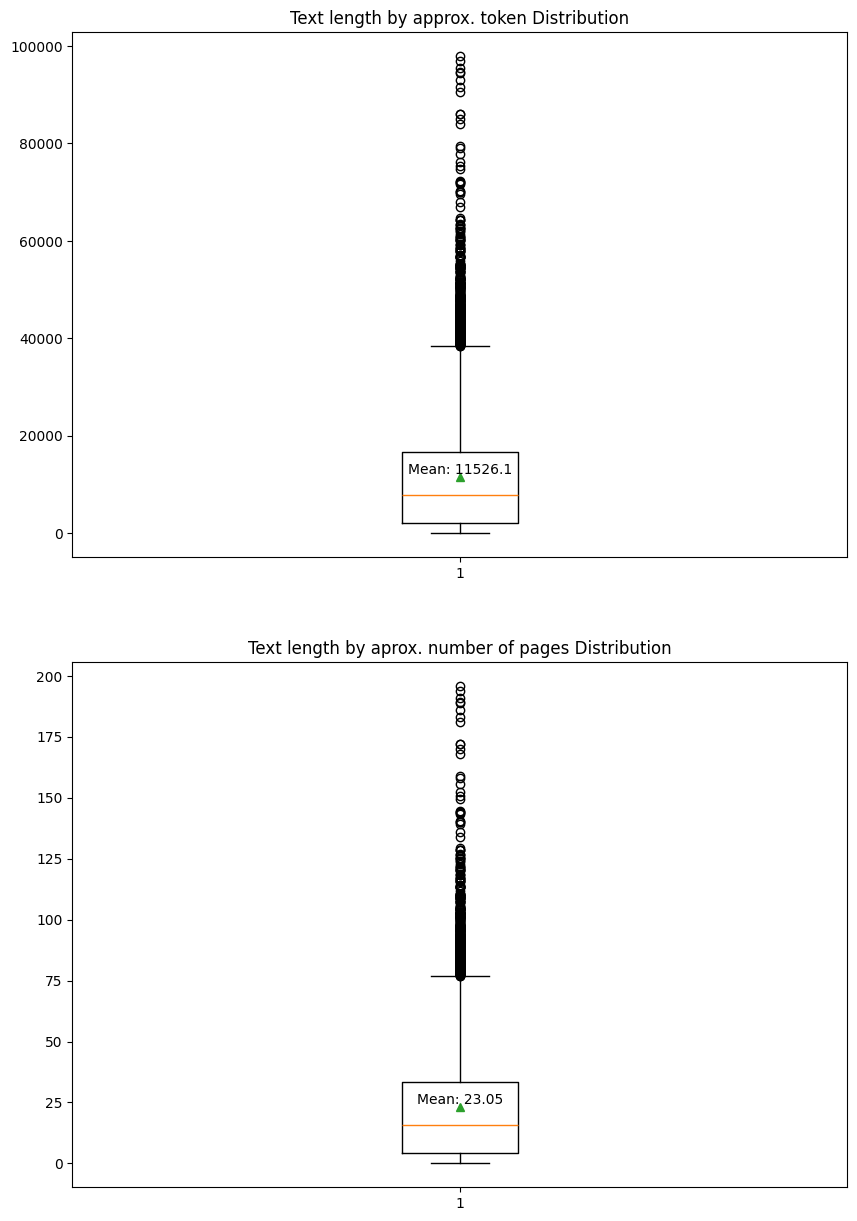

In [45]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(10, 15, forward=True)

Q1 = np.percentile(data_filter["naive_length"], 25, axis=0)
Q3 = np.percentile(data_filter["naive_length"], 75, axis=0)
mean = np.mean(data_filter["naive_length"])

ax[0].boxplot(data_filter["naive_length"], showmeans=True, showcaps=True)

ax[0].annotate(f"Mean: {round(mean, 2)}", 
                (1, mean), 
                ha='center', va='bottom')

ax[0].set_title("Text length by approx. token Distribution")

######################

Q1 = np.percentile(data_filter["naive_page_num"], 25, axis=0)
Q3 = np.percentile(data_filter["naive_page_num"], 75, axis=0)
mean = np.mean(data_filter["naive_page_num"])

ax[1].boxplot(data_filter["naive_page_num"], showmeans=True, showcaps=True)

ax[1].annotate(f"Mean: {round(mean, 2)}", 
                (1, mean), 
                ha='center', va='bottom')

ax[1].set_title("Text length by aprox. number of pages Distribution")


# fig.tight_layout()
plt.show()

In [46]:
data_filter.columns

Index(['extracted_text', 'entity_type', 'nature', 'naive_length',
       'naive_page_num'],
      dtype='object')

In [47]:
data_filter.pivot_table(values="naive_length", index=["nature"]).apply(lambda x: round(x))

,naive_length
nature,
acte.arrete,9289.0
acte.delib,8500.0
acte.raa,10910.0
bdj,16717.0
comm,11041.0
dlao.autres,18559.0
dlao.plu,14511.0
other,10139.0
pv.cr,9326.0


In [48]:
data_filter.pivot_table(values="naive_length", index=["entity_type"]).apply(lambda x:round(x))

,naive_length
entity_type,
Autre groupement,8817.0
Autre partie prenante,19901.0
Collectivité à statut particulier,18060.0
Commune,10211.0
Conseil départemental,13262.0
Conseil régional,20090.0
Etablissement public,21364.0
Intercommunalité,12993.0
Préfecture,13526.0


In [49]:
data_filter.pivot_table(values="naive_length", index=["entity_type"], columns=["nature"]).apply(lambda x:round(x))

nature,acte.arrete,acte.delib,acte.raa,bdj,comm,dlao.autres,dlao.plu,other,pv.cr,pv.full
entity_type,,,,,,,,,,
Autre groupement,14337.0,9746.0,NaN,17311.0,6904.0,10395.0,11596.0,6983.0,10591.0,17208.0
Autre partie prenante,9298.0,NaN,NaN,24042.0,21668.0,NaN,15427.0,376.0,NaN,NaN
Collectivité à statut particulier,NaN,NaN,NaN,12163.0,18433.0,NaN,22143.0,4820.0,NaN,NaN
Commune,5164.0,6828.0,10524.0,13772.0,10223.0,18762.0,12823.0,6155.0,7586.0,18877.0
Conseil départemental,13907.0,12442.0,NaN,29326.0,12084.0,8874.0,12860.0,11289.0,9890.0,37572.0
Conseil régional,NaN,14453.0,NaN,27233.0,17799.0,25828.0,21614.0,13919.0,22676.0,70328.0
Etablissement public,NaN,NaN,NaN,37515.0,31030.0,NaN,21933.0,7042.0,20354.0,NaN
Intercommunalité,8422.0,11232.0,NaN,17413.0,13023.0,20787.0,15698.0,11993.0,10977.0,22521.0
Préfecture,9712.0,25625.0,17274.0,17918.0,10405.0,15804.0,17659.0,3017.0,13793.0,45220.0


## Sampling

Given that we cannot manually check that much data, we are just going to sample one document every ascending quantile of 12.5. In total, we will have 8 docs of ascending length.

In [50]:
data_to_annotate = pd.DataFrame(columns=data.columns)

In [51]:
ranges_quantiles = list(np.arange(0, 1, (1/8))) + [1]

In [52]:
ranges_quantiles

[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]

In [53]:
lower_bound_value = data["naive_length"].quantile(ranges_quantiles[1])
lower_bound_value

723.0

To avoid text that are way too short and not representative of the shorter data, we are going to set the minimun length to 300.

In [54]:
min_len = 300

In [55]:
indexes = []

i = 0
while i < len(ranges_quantiles) - 1:
    
    lower_bound = ranges_quantiles[i]
    upper_bound = ranges_quantiles[i + 1]
    
    lower_bound_value = data["naive_length"].quantile(lower_bound)
    upper_bound_value = data["naive_length"].quantile(upper_bound)
    # print("Length between", lower_bound_value, upper_bound_value)
    
    data_in_range = data[(data["naive_length"] > lower_bound_value) 
                        & (data["naive_length"] < upper_bound_value) 
                        & (data["naive_length"] > min_len)]
    # print(data_in_range)
    
    data_sample = data_in_range.sample(1, random_state=40)
    index = data_sample.index
    
    indexes.append(index)
    data_to_annotate = pd.concat([data_to_annotate, data_sample], axis=0)
    
    i = i + 1

C:\Users\alber\AppData\Local\Temp\ipykernel_17720\1198981702.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_to_annotate = pd.concat([data_to_annotate, data_sample], axis=0)


In [56]:
data_to_annotate

,doc_id,url,cache,fulltext,nature,published,entity_name,entity_type,geo_path,extracted_text,embeddings,typed_embeddings,km_cluster_labels,llama3:1b_llm_is_project,naive_length
6374,1944/af78ade6b29b3934a8eb5591bfb584d535f3fca8_...,https://www.laval.fr/fileadmin/documents/Docum...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,dlao.plu,2024-03-04 00:00:00,Laval,Commune,Laval/CA Laval Agglomération/Mayenne/Pays de l...,Annexe – bilan de la concertation et les proje...,[-7.49857770e-03 -8.16428363e-02 3.74904200e-...,"[-0.0074985777, -0.0816428363, 0.03749042, 0.1...",1.0,NaN,341
8261,2087/372784ba70ba9e30dae2962d07359f76ebb8a162_...,https://www.vendeegrandlittoral.fr/medias/2024...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,dlao.plu,2024-06-01 00:00:00,CC Vendée Grand Littoral,Intercommunalité,CC Vendée Grand Littoral/Vendée/Pays de la Loire,COMMUNE DE MOUTIERS-LES-MAUXFAITS PRODUCTION D...,[ 3.72018591e-02 1.07426725e-01 4.84213047e-...,"[0.0372018591, 0.107426725, 0.0484213047, 0.16...",1.0,NaN,901
9502,2691/2f21df2f6285cf23ffed3cc5aaf9cea23c37674f_...,https://www.anjoubleucommunaute.fr/medias/2024...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2024-04-15 00:00:00,CC Anjou Bleu Communauté,Intercommunalité,CC Anjou Bleu Communauté/Maine-et-Loire/Pays d...,"EDITO Comme chaque année, Anjou Bleu Communaut...",NaN,NaN,NaN,NaN,3541
9316,57/84c75222e4da1c472a7b8a68e5c9b3fabe8c208b_18...,https://www.grenoble.fr/uploads/Externe/da/183...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2023-04-03 00:00:00,Grenoble,Commune,Grenoble/Grenoble-Alpes-Métropole/Isère/Auverg...,Dossier de presse 2024 Grenoble 2024 : transit...,NaN,NaN,NaN,NaN,6476
8812,4957/030656d023e627e0a223d7c0a7ac8eae1d8fa1dd_...,https://www.mairie-eaunes.fr/eaunes/wp-content...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2024-04-11 00:00:00,Eaunes,Commune,Eaunes/CA Le Muretain Agglo/Haute-Garonne/Occi...,VOTRE MAGAZINE MUNICIPAL JUIN 2024 UN NOUVEAU ...,NaN,NaN,NaN,NaN,8952
8531,3452/b7f804c6459ddf796d1adb95495c837d0235bba9_...,https://www.betschdorf.com/images/2-Publicatio...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2023-05-13 00:00:00,Betschdorf,Commune,Betschdorf/CC de l'Outre-Forêt/Bas-Rhin/Grand Est,R O F K ’ I H D C S S T E B S’ Octobre 2023 r ...,NaN,NaN,NaN,NaN,11728
7744,4429/5b0cc4b420331c1f97b20169e04baaa81a495023_...,https://www.villemeux.fr/wp-content/uploads/1....,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,dlao.plu,2021-05-21 00:00:00,Villemeux-sur-Eure,Commune,Villemeux-sur-Eure/CA Agglo du Pays de Dreux (...,2 Villemeux-sur-Eure - Rapport de présentation...,[ 5.14076054e-02 1.33556455e-01 6.86618388e-...,"[0.0514076054, 0.133556455, 0.0686618388, 0.05...",1.0,NaN,17357
7625,3065/9ef933dd7bf6c5090deb1acfaff5a9d9212d5b77_...,https://www.nicecotedazur.org/uploads/files/ma...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,dlao.plu,2020-06-30 00:00:00,Métropole Nice Côte d'Azur,Intercommunalité,Métropole Nice Côte d'Azur/Alpes-Maritimes/Pro...,Dossier de réalisation de ZAC - Mise à jour de...,[ 1.95905175e-02 1.25156492e-01 -6.80414736e-...,"[0.0195905175, 0.125156492, -0.0680414736, 0.1...",1.0,NaN,43050


In [57]:
data_to_annotate.columns

Index(['doc_id', 'url', 'cache', 'fulltext', 'nature', 'published',
       'entity_name', 'entity_type', 'geo_path', 'extracted_text',
       'embeddings', 'typed_embeddings', 'km_cluster_labels',
       'llama3:1b_llm_is_project', 'naive_length'],
      dtype='object')

In [58]:
data_to_annotate = data_to_annotate[['doc_id', 'url', 'cache', 'fulltext', 'nature', 'published',
    'entity_name', 'entity_type', 'geo_path', 'extracted_text',
    'naive_length']]

In [59]:
indexes

[Index([6374], dtype='int64'),
 Index([8261], dtype='int64'),
 Index([9502], dtype='int64'),
 Index([9316], dtype='int64'),
 Index([8812], dtype='int64'),
 Index([8531], dtype='int64'),
 Index([7744], dtype='int64'),
 Index([7625], dtype='int64')]

In [60]:
data_to_annotate.to_csv("data_to_manually_annotate.csv", index=indexes, index_label="Index")

In [61]:
import pandas as pd

df = pd.read_csv("data_to_manually_annotate.csv")
df.head()

,Index,doc_id,url,cache,fulltext,nature,published,entity_name,entity_type,geo_path,extracted_text,naive_length
0,6374,1944/af78ade6b29b3934a8eb5591bfb584d535f3fca8_...,https://www.laval.fr/fileadmin/documents/Docum...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,dlao.plu,2024-03-04 00:00:00,Laval,Commune,Laval/CA Laval Agglomération/Mayenne/Pays de l...,Annexe – bilan de la concertation et les proje...,341
1,8261,2087/372784ba70ba9e30dae2962d07359f76ebb8a162_...,https://www.vendeegrandlittoral.fr/medias/2024...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,dlao.plu,2024-06-01 00:00:00,CC Vendée Grand Littoral,Intercommunalité,CC Vendée Grand Littoral/Vendée/Pays de la Loire,COMMUNE DE MOUTIERS-LES-MAUXFAITS PRODUCTION D...,901
2,9502,2691/2f21df2f6285cf23ffed3cc5aaf9cea23c37674f_...,https://www.anjoubleucommunaute.fr/medias/2024...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2024-04-15 00:00:00,CC Anjou Bleu Communauté,Intercommunalité,CC Anjou Bleu Communauté/Maine-et-Loire/Pays d...,"EDITO Comme chaque année, Anjou Bleu Communaut...",3541
3,9316,57/84c75222e4da1c472a7b8a68e5c9b3fabe8c208b_18...,https://www.grenoble.fr/uploads/Externe/da/183...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2023-04-03 00:00:00,Grenoble,Commune,Grenoble/Grenoble-Alpes-Métropole/Isère/Auverg...,Dossier de presse 2024 Grenoble 2024 : transit...,6476
4,8812,4957/030656d023e627e0a223d7c0a7ac8eae1d8fa1dd_...,https://www.mairie-eaunes.fr/eaunes/wp-content...,https://datapolitics-public.s3.gra.io.cloud.ov...,https://datapolitics-public.s3.gra.io.cloud.ov...,comm,2024-04-11 00:00:00,Eaunes,Commune,Eaunes/CA Le Muretain Agglo/Haute-Garonne/Occi...,VOTRE MAGAZINE MUNICIPAL JUIN 2024 UN NOUVEAU ...,8952
